In [1]:
#validation set= evaluates the performance of model on diffrent hyperparamter setting(externally set by user)like learning rate,hidden layers etc,.
#selects the set which gives best result on validation data. it generalises the model well.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [5]:
#normalize the pixel values between 0 to 1
x_train=x_train/255
x_test=x_test/255

In [6]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='elu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#sparse_categoriical_crossentropy for multiclass classfication
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
#model.fit(x_train,y_train,epochs=10)
#y_one_hot_encode= tf.one_hot.y(y_train,10)
train_model=model.fit(x_train,y_train,epochs=5,validation_split=0.2)#validation_data=(x_test,y_test)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3234 - accuracy: 0.9056 - val_loss: 0.2012 - val_accuracy: 0.9424
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1605 - accuracy: 0.9528 - val_loss: 0.1313 - val_accuracy: 0.9638
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1093 - accuracy: 0.9673 - val_loss: 0.1073 - val_accuracy: 0.9680
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0816 - accuracy: 0.9753 - val_loss: 0.1050 - val_accuracy: 0.9707
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0975 - val_accuracy: 0.9708


In [10]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [11]:
y_pred=y_prob.argmax(axis=1)#converts predicted probabilities into the final class labels

In [19]:
from sklearn.metrics import accuracy_score,classification_report 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9719
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.95      0.98      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



4


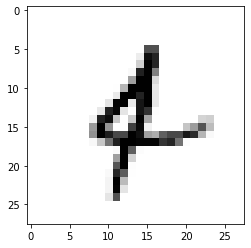

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_test[300],cmap="Greys")
print(y_test[300])

In [14]:
print(train_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


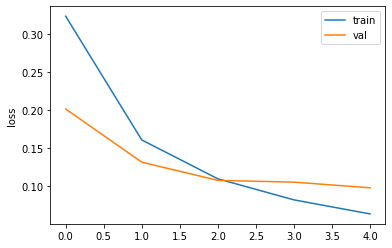

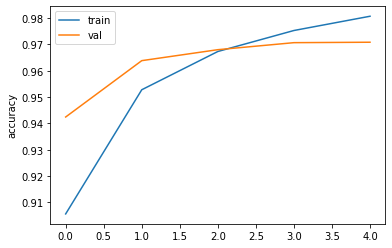

In [15]:
plt.plot(train_model.history['loss'], label='train')
plt.plot(train_model.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(train_model.history['accuracy'], label='train')
plt.plot(train_model.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()
